In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[64.0, 1.0, 256.0, 512.0, 1024.0, 2.0, 4.0, 8.0]
[-5.87493975 30.71871382]


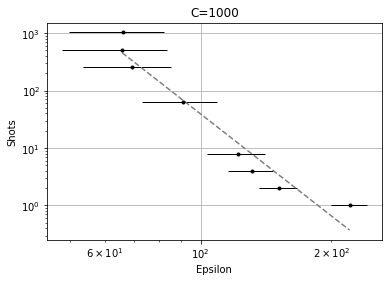

[-2.74819486  0.78063838]


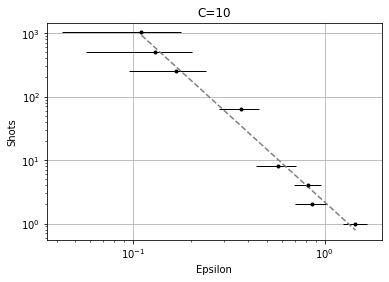

In [51]:
# Import data
margin = -0.1
N = 500
data = pd.read_csv(f'experiments/shots_margin{margin}_data.csv')
errors = np.array(data.iloc[:, 4 + 2*N:])[:,-1]
shots = list(set(data['R']))
print(shots)

# Plot in loglog #shots ~ epsilon
Cs = list(set(data['C']))
for C in Cs:
    filter = data['C'] == C
    means = [np.mean(errors[filter & (data['R'] == R)]) for R in shots]
    stds = [np.std(errors[filter & (data['R'] == R)]) for R in shots]
    plt.errorbar(means,shots,xerr=stds,linestyle='',marker='.',ecolor='black',elinewidth=1,color='black')
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Shots')
    plt.xlabel('Epsilon')
    p = np.polyfit(np.log(means),np.log(shots),1)
    print(p)
    xfine = np.linspace(min(means),max(means),100)
    plt.plot(xfine,np.exp(p[1])*xfine**p[0],'--',color='grey')
    plt.grid()
    plt.title(f'C={int(C)}')
    plt.show()

In [6]:
?np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a uniform distribution over all
    entr